# An implementation of recommendation system based on matrix frac

## Preprocess input data and setting parameters

In [61]:
import numpy as np
import random
import json

In [2]:
JSON_FILE = "renttherunway_final_data.json"
NONE_RATING = "8.0"

In [60]:
def preprocess_json(json_file):
    user_ids = []
    item_ids = []
    ratings = []

    with open(json_file) as f:
        cnt = 0
        for line in f:
            cnt += 1
            if cnt % 4 != 0:
                continue
            entry = json.loads(line)

            user_ids.append(entry["user_id"])
            item_ids.append(entry["item_id"])
            rating = entry.get("rating")
            if rating is not None:
                ratings.append(float(rating))
            else:
                ratings.append(NONE_RATING)
            

    user_ids = np.array(user_ids)
    item_ids = np.array(item_ids)
    ratings = np.array(ratings)

    unique_user_ids = np.unique(user_ids)
    unique_item_ids = np.unique(item_ids)

    user_index = {user_id: index for index, user_id in enumerate(unique_user_ids)}
    item_index = {item_id: index for index, item_id in enumerate(unique_item_ids)}

    matrix = np.zeros((len(unique_user_ids), len(unique_item_ids)))

    for user_id, item_id, rating in zip(user_ids, item_ids, ratings):
        user_idx = user_index[user_id]
        item_idx = item_index[item_id]
        matrix[user_idx, item_idx] = rating

    return matrix

# Usage
matrix = preprocess_json(JSON_FILE)

def check(matrix):
    row, col = matrix.shape
    print("Shape: ", matrix.shape)

    cnt = 0
    non_zero_ret = []
    for i in range(row):
        print("Peeking row: ", i)
        for j in range(col):
            if matrix[i, j] != 0:
                print("None zero element: ", matrix[i, j])
                non_zero_ret.append((i, j))
                cnt += 1
    print("None zero elements: ", cnt)

    return non_zero_ret

non_zero_location = check(matrix)

Shape:  (36941, 4976)
Peeking row:  0
None zero element:  10.0
Peeking row:  1
None zero element:  10.0
Peeking row:  2
None zero element:  8.0
None zero element:  10.0
Peeking row:  3
None zero element:  10.0
Peeking row:  4
None zero element:  6.0
Peeking row:  5
None zero element:  8.0
Peeking row:  6
None zero element:  6.0
None zero element:  10.0
Peeking row:  7
None zero element:  10.0
Peeking row:  8
None zero element:  8.0
Peeking row:  9
None zero element:  8.0
Peeking row:  10
None zero element:  10.0
Peeking row:  11
None zero element:  10.0
Peeking row:  12
None zero element:  10.0
Peeking row:  13
None zero element:  10.0
None zero element:  10.0
None zero element:  10.0
None zero element:  10.0
Peeking row:  14
None zero element:  10.0
Peeking row:  15
None zero element:  10.0
Peeking row:  16
None zero element:  10.0
Peeking row:  17
None zero element:  10.0
None zero element:  8.0
None zero element:  10.0
Peeking row:  18
None zero element:  10.0
Peeking row:  19
None 

## Checkpoint1: implement the MF

In [83]:
def calculate_rmse(original, reconstructed):
    # Calculate the squared differences
    squared_diff = np.square(original - reconstructed)
    
    # Compute the mean of squared differences
    mean_squared_diff = np.mean(squared_diff)
    
    # Calculate the RMSE
    rmse = np.sqrt(mean_squared_diff)
    
    return rmse

In [59]:
def matrix_factorization(matrix, k, epsilon, lambd, iterations, threshold = 1e-4):
    num_users, num_items = matrix.shape

    # Initialize P and Q matrices with random values
    P = np.random.rand(num_users, k)
    Q = np.random.rand(k, num_items)

    check(P)
    check(Q)

    print(P, Q)

    current_loss = 0.0

    for _ in range(iterations):
        for i in range(num_users):
            print("Peeking row: ", i)
            for j in range(num_items):
                if matrix[i, j] != 0.0:
                    error = matrix[i, j] - np.dot(P[i, :], Q[:, j])
                    # print("error: ", error)
                    if np.isnan(error):
                        print("NAN DEBUG INFO")
                        print(f"P[{i}]", P[i, :])
                        print(f"Q[{j}]", Q[:, j])
                        print(f"mat[{i}][{j}]: ", matrix[i][j])


                    for l in range(k):
                        P[i, l] += epsilon * ((2 * error * Q[l, j]) - lambd * P[i, l])
                        Q[l, j] += epsilon * ((2 * error * P[i, l]) - lambd * Q[l, j])

        # Calculate current loss
        predicted_matrix = np.dot(P, Q)
        current_loss = np.linalg.norm(matrix - predicted_matrix, ord="fro")
        print("Loss: ", current_loss)

        if current_loss <= threshold:
            break

    return P, Q

k = 2
epsilon = 0.01
lambd = 0.01
iteration = 20

test_mat = np.array([[5, 0, 4, 0], [4, 4, 3, 0], [1, 0, 0, 2]])
P, Q = matrix_factorization(test_mat, k, epsilon, lambd, iteration)
print(np.dot(P, Q))


Shape:  (3, 2)
Peeking row:  0
Peeking row:  1
Peeking row:  2
Shape:  (2, 4)
Peeking row:  0
Peeking row:  1
[[0.98750367 0.82491613]
 [0.61968624 0.19382607]
 [0.46591207 0.64336055]] [[0.21615149 0.74757255 0.9886994  0.57924134]
 [0.67982251 0.53359696 0.81878513 0.17787539]]
Peeking row:  0
Peeking row:  1
Peeking row:  2
Loss:  7.290711763746173
Peeking row:  0
Peeking row:  1
Peeking row:  2
Loss:  6.767064353723048
Peeking row:  0
Peeking row:  1
Peeking row:  2
Loss:  6.236443320686931
Peeking row:  0
Peeking row:  1
Peeking row:  2
Loss:  5.746925541902794
Peeking row:  0
Peeking row:  1
Peeking row:  2
Loss:  5.3469385922369455
Peeking row:  0
Peeking row:  1
Peeking row:  2
Loss:  5.068073614042429
Peeking row:  0
Peeking row:  1
Peeking row:  2
Loss:  4.913763440904389
Peeking row:  0
Peeking row:  1
Peeking row:  2
Loss:  4.862557793319633
Peeking row:  0
Peeking row:  1
Peeking row:  2
Loss:  4.8823208863930345
Peeking row:  0
Peeking row:  1
Peeking row:  2
Loss:  4.943

In [87]:
def calculate_rmse(original, reconstructed, loc):
    # Calculate the squared differences
    error = 0
    for i, j in loc:
        error += (original[i, j] - reconstructed[i, j]) ** 2
    
    # Calculate the RMSE
    rmse = np.sqrt(error)
    
    return rmse

# reconstruct_mat = np.dot(P, Q)
# check(reconstruct_mat)
# print(calculate_rmse(reconstruct_mat, matrix))

## Checkpoint 2: SGD MF
As we can seen from the result, MF algorithm only works efficiently for small scale matrix but very bad for large-scale matrix, so I choose to use SGD to accelerate the learning rate of Regularized MF

In [110]:
def sgd(matrix, location, k, epsilon, lambd, iterations, threshold=1e-4):
    num_users, num_items = matrix.shape

    # Initialize P and Q matrices with random values
    P = np.random.rand(num_users, k)
    Q = np.random.rand(k, num_items)

    x_axis = []
    y_axis = []

    current_loss = 0.0

    for _ in range(iterations):
        i, j = random.choice(location)

        if matrix[i, j] == 0.0:
            raise ArithmeticError

        # print("Peeking row:", i)

        error_ij = matrix[i, j] - np.dot(P[i, :], Q[:, j])

        for l in range(k):
            temp_p = P[i, l]
            P[i, l] += epsilon * (2 * error_ij * Q[l, j] - lambd * P[i, l])
            Q[l, j] += epsilon * (2 * error_ij * temp_p - lambd * Q[l, j])

        # Calculate current loss
        if _ % 500 == 0 :
            predicted_matrix = np.dot(P, Q)
            current_loss = calculate_rmse(matrix, predicted_matrix, location)
            print(f"Iteration {_}, RMSE: ", current_loss)
            x_axis.append(_)
            y_axis.append(current_loss)

        if current_loss <= threshold:
            break

    return P, Q, x_axis, y_axis

In [111]:
k = 2
epsilon = 0.01
lambd = 0.01
iteration = 100000

test_mat = np.array([[5, 0, 4, 0], [4, 4, 3, 0], [1, 0, 0, 2]])
loc = check(test_mat)
P, Q, x, y = sgd(test_mat, loc, k, epsilon, lambd, iteration)
print(np.dot(P, Q))



Shape:  (3, 4)
Peeking row:  0
None zero element:  5
None zero element:  4
Peeking row:  1
None zero element:  4
None zero element:  4
None zero element:  3
Peeking row:  2
None zero element:  1
None zero element:  2
None zero elements:  7
Iteration 0, RMSE:  7.993361341988104
Iteration 500, RMSE:  0.7882634598072558
Iteration 1000, RMSE:  0.5465682382284895
Iteration 1500, RMSE:  0.41587009395658464
Iteration 2000, RMSE:  0.31181390128262276
Iteration 2500, RMSE:  0.27733527867236535
Iteration 3000, RMSE:  0.19544619339291833
Iteration 3500, RMSE:  0.15664787675543537
Iteration 4000, RMSE:  0.11107150568534058
Iteration 4500, RMSE:  0.0849469136312415
Iteration 5000, RMSE:  0.06574950226671553
Iteration 5500, RMSE:  0.05198251798878342
Iteration 6000, RMSE:  0.04503468293196312
Iteration 6500, RMSE:  0.038021892566894665
Iteration 7000, RMSE:  0.032771482114116096
Iteration 7500, RMSE:  0.030603424758439815
Iteration 8000, RMSE:  0.02911468153084383
Iteration 8500, RMSE:  0.0323199486

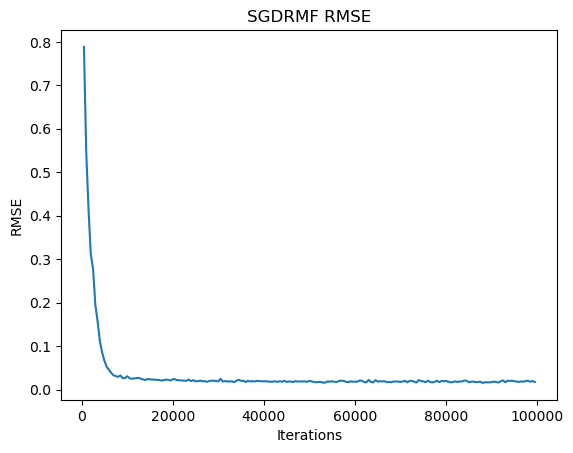

In [113]:
import matplotlib.pyplot as plt

def plot_rmse(iterations, rmse_values):
    plt.plot(iterations, rmse_values)
    plt.xlabel('Iterations')
    plt.ylabel('RMSE')
    plt.title('SGDRMF RMSE')
    plt.show()

plot_rmse(x[1: ], y[1: ])

In [108]:
k = 10
epsilon = 0.01
lambd = 0.01
iteration = 200000

Pm, Qm = sgd(matrix, non_zero_location, k, epsilon, lambd, iteration)

Iteration 0, RMSE:  1485.1057209248097
Iteration 500, RMSE:  1439.7442182207608
Iteration 1000, RMSE:  1404.6590532998466
Iteration 1500, RMSE:  1375.0080563779188
Iteration 2000, RMSE:  1348.9340885709557
Iteration 2500, RMSE:  1324.2453520636725
Iteration 3000, RMSE:  1303.726523367476
Iteration 3500, RMSE:  1284.4817087764432
Iteration 4000, RMSE:  1265.5319404407905
Iteration 4500, RMSE:  1248.1773567083742
Iteration 5000, RMSE:  1232.4860058152708
Iteration 5500, RMSE:  1216.9484535012618
Iteration 6000, RMSE:  1201.3510842690077
Iteration 6500, RMSE:  1187.9640662199954
Iteration 7000, RMSE:  1174.333604458379
Iteration 7500, RMSE:  1160.6918667367013
Iteration 8000, RMSE:  1148.5510307340815
Iteration 8500, RMSE:  1136.8764646319619
Iteration 9000, RMSE:  1125.0028271858305
Iteration 9500, RMSE:  1113.8115005349414
Iteration 10000, RMSE:  1103.2328819717134
Iteration 10500, RMSE:  1092.7235742048854
Iteration 11000, RMSE:  1082.3606342375635
Iteration 11500, RMSE:  1072.58866225

## Recommendation
Use the factorized P and Q, exclude rated items and get the top-N predicted rating item id

In [116]:
def recommend_items(user_id, recommend_num, P, Q, rated_items):
    user_idx = user_id - 1  # Adjust user_id to zero-based index

    # Calculate predicted ratings for the user
    user_ratings = np.dot(P[user_idx, :], Q)

    # Exclude the rated items
    unrated_items = np.where(rated_items[user_idx, :] == 0)[0]
    user_ratings[unrated_items] = -np.inf

    # Get top-rated item indices
    top_indices = np.argsort(user_ratings)[::-1][:recommend_num]

    # Adjust item indices to one-based index
    top_indices += 1

    items = list(top_indices)
    print(f"Recommendation result: user_id: {user_id}, items: {items}")

    return list(top_indices)

items = recommend_items(1, 10, Pm, Qm, matrix)

Recommendation result: user_id: 1, items: [908, 4976, 1661, 1655, 1656, 1657, 1658, 1659, 1660, 1662]
